In [23]:
import pandas as pd
import matplotlib.pyplot as plt
excel_file = 'Linares Lopez_Ferral.xlsx'
#Df base. Tosos los datos
df = pd.read_excel(excel_file, header=0)
print(df.head())


           Periodista   Posicion    Formato Archivo            Tema 1 Tema 2  \
0  María Elena Ferral  Reportero  Reportaje   Texto          Noticias    NaN   
1  María Elena Ferral  Reportero  Reportaje   Texto         Educación    NaN   
2  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   
3  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   
4  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   

  Sección         Etiquetas  \
0   Local             Local   
1   Local  Educación, local   
2   Local    Cultura, local   
3   Local    Cultura, local   
4   Local    Cultura, local   

                                              Título             Medio  ...  \
0      Colectan focos para iluminar parque papanteco  Diario de Xalapa  ...   
1  Reanudan clases en primaria de Papantla; quita...  Diario de Xalapa  ...   
2  Afinan detalles en Papantla para el Día de Mue...  Diario de Xalapa  ...   
3  Con el Xantol

Numero de textos por tema


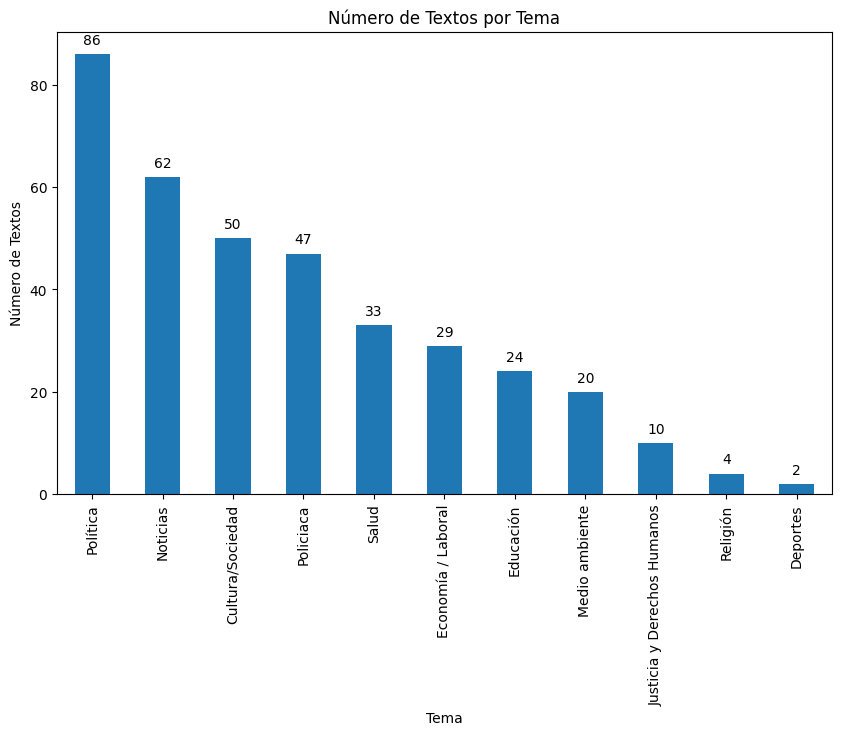

In [25]:
#Observaciones respecto a la base de datos
print('Numero de textos por tema')
conteo_temas = df['Tema 1'].value_counts()

#Grafica de barras
plt.figure(figsize=(10,6))
ax = conteo_temas.plot(kind='bar')
plt.title('Número de Textos por Tema')
plt.xlabel('Tema')
plt.ylabel('Número de Textos')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar la gráfica
plt.show()


In [26]:
print(df.columns)

Index(['Periodista', 'Posicion', 'Formato', 'Archivo', 'Tema 1', 'Tema 2',
       'Sección', 'Etiquetas', 'Título', 'Medio', 'FDP (aaaa-mm-dd)', 'Enlace',
       'Wayback Machine', 'archive.today', 'Captura PNG', 'Página descargada',
       'Google Drive', 'Texto', 'Localidad', 'Municipio', 'Entidad',
       'CVE_INEGI', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'Compilación',
       'Coautores', 'Notas', 'Duración del video (hh:mm:ss)'],
      dtype='object')


                             count        mean         std    min     25%  \
Tema 1                                                                      
Cultura/Sociedad              50.0  303.460000  211.322001    1.0  175.75   
Deportes                       2.0   36.000000    7.071068   31.0   33.50   
Economía / Laboral            29.0  349.206897  359.574687   33.0  178.00   
Educación                     24.0  293.416667  170.220807  110.0  215.50   
Justicia y Derechos Humanos   10.0  473.500000  271.848508   79.0  334.25   
Medio ambiente                20.0  303.700000   93.633721  170.0  245.00   
Noticias                      62.0  299.629032  241.214905    5.0  187.75   
Policiaca                     47.0  286.851064  136.480127  100.0  202.50   
Política                      86.0  611.383721  442.288864  150.0  289.00   
Religión                       4.0  316.000000   77.364936  249.0  255.00   
Salud                         33.0  296.606061  143.592292   26.0  246.00   

<Figure size 1000x600 with 0 Axes>

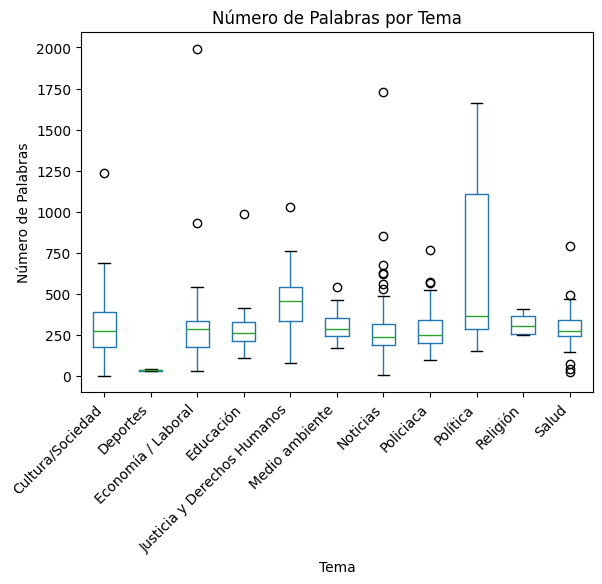

In [29]:
#Analisis de la longitud de los textos por tema

#Funcion para contar palabras
def contar_palabras(texto):
    return len(texto.split())

#Se agrega una columna con la longitud de los textos

df['num_palabras'] = df['Texto'].apply(lambda x: contar_palabras(str(x)))
longitud_por_tema = df.groupby('Tema 1')
print(longitud_por_tema['num_palabras'].describe())


#Grafica de cajas
plt.figure(figsize=(10,6))
df.boxplot(column='num_palabras', by='Tema 1', grid=False)
plt.title('Número de Palabras por Tema')
plt.suptitle('')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Palabras')
plt.show()

In [41]:
#Analisis de uso de palabras clave

#creamos un df copia
df_palabras_clave = df

#Mención de partidos políticos
lista_partidos_politicos = ['Morena', 'PAN', 'PRI', 'PRD', 'PT', 'PVEM', 'MC', 'PES', 'RSP']


def texto_menciona_partido(texto):
    for partido in lista_partidos_politicos:
        if partido in texto:
            return True
    return False

#Contiene o no cada partido político

df_palabras_clave['Mencion Partido Politico']=df_palabras_clave['Texto'].apply(lambda x: texto_menciona_partido(str(x)))

print(df_palabras_clave['Mencion Partido Politico'].value_counts())

mencion_partido_temas=df_palabras_clave.groupby('Tema 1')['Mencion Partido Politico'].value_counts(normalize=True).unstack()

print(mencion_partido_temas)






Mencion Partido Politico
False    440
True     167
Name: count, dtype: int64
Mencion Partido Politico        False     True 
Tema 1                                         
Cultura/Sociedad             0.980000  0.020000
Deportes                     1.000000       NaN
Economía / Laboral           0.931034  0.068966
Educación                    0.958333  0.041667
Justicia y Derechos Humanos  0.800000  0.200000
Medio ambiente               1.000000       NaN
Noticias                     0.967742  0.032258
Policiaca                    0.936170  0.063830
Política                     0.232558  0.767442
Religión                     1.000000       NaN
Salud                        0.787879  0.212121
